In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Nonredund_stru_annotations.csv')

# Filter rows with PDB ID column as "6ckl"
filtered_df = df[df['PDB ID'] == '6ckl']

# Output the filtered rows
print(filtered_df)


      Q-BioLiP ID PDB ID Assembly ID   Stoichiometry  Resolution (Å)  \
96946   BL1647507   6ckl      6ckl_2  Homo 2-mer -A2           2.684   
96947   BL1647508   6ckl      6ckl_2  Homo 2-mer -A2           2.684   
96948   BL1647510   6ckl      6ckl_2  Homo 2-mer -A2           2.684   
96949   BL1647511   6ckl      6ckl_2  Homo 2-mer -A2           2.684   

      Uniprot ID      Assembly Detail Ligand ID  Site  Ligand Detail  \
96946     P0A0Z8  author and software       DAN  BS01  6ckl_2_DAN_K2   
96947     P0A0Z8  author and software       C5P  BS02  6ckl_2_C5P_L1   
96948     P0A0Z8  author and software       C5P  BS04  6ckl_2_C5P_L2   
96949     P0A0Z8  author and software       DAN  BS05  6ckl_2_DAN_K1   

      Pubmed ID Interaction Relevant  \
96946  31583886         yes      yes   
96947  31583886         yes      yes   
96948  31583886         yes      yes   
96949  31583886         yes      yes   

                                            Binding Site  \
96946  C1:K142 L1

In [6]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Q-BioLiP_all.csv')

# Filter rows with PDB ID column as "6ckl"
filtered_df = df[df['PDB ID'] == '6ckl']

# Output the filtered rows
print(filtered_df['Ligand Detail'])


/tmp/ipykernel_23365/3537616181.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Q-BioLiP_all.csv')


1647499     6ckl_1_DAN_F
1647500     6ckl_1_FLC_H
1647501     6ckl_1_C5P_D
1647502     6ckl_1_DAN_G
1647503      6ckl_1_CL_J
1647504      6ckl_1_CL_E
1647505     6ckl_1_C5P_I
1647506    6ckl_2_DAN_K2
1647507    6ckl_2_C5P_L1
1647508    6ckl_2_FLC_M2
1647509    6ckl_2_C5P_L2
1647510    6ckl_2_DAN_K1
1647511     6ckl_2_CL_N1
1647512     6ckl_2_CL_N2
1647513    6ckl_2_FLC_M1
Name: Ligand Detail, dtype: object


In [3]:
file = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/lig_pdb/1uys_1_H1L_D2.pdb'

In [2]:
from openbabel.pybel import (readfile,Outputfile) 
def MolFormatConversion(input_file:str,output_file:str,input_format="pdb",output_format="mol2"):
    molecules = readfile(input_format,input_file)
    output_file_writer = Outputfile(output_format,output_file)
    for i,molecule in enumerate(molecules):
        output_file_writer.write(molecule)
    output_file_writer.close()
    print('%d molecules converted'%(i+1))

In [5]:
output_file = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/test.mol2'
MolFormatConversion(file,output_file)

1 molecules converted


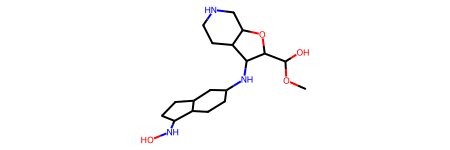

In [6]:
from rdkit import Chem

mol = Chem.MolFromPDBFile('/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/lig_pdb/3ppj_1_FOI_C.pdb')

ligand

In [31]:
from Bio.PDB import PDBParser
protein_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio/2a5b/2a5b_protein.pdb'
ligand_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio/2a5b/2a5b_1_8HG_D2.pdb'
ligand = Chem.MolFromPDBFile(ligand_path)
np.array(ligand.GetConformer(0).GetPositions())
# Parse the PDB file
parser = PDBParser()
structure = parser.get_structure('protein', protein_path)

# Get the coordinates of each amino acid
coordinates = []
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                coordinates.append(atom.get_coord())

# Print the coordinates
# for coord in coordinates:
#     print(coord)
np.array(coordinates)

array([[ 2.456, 13.473, 27.658],
       [ 3.233, 12.516, 26.819],
       [ 2.917, 12.695, 25.339],
       ...,
       [ 9.824, 69.795,  9.65 ],
       [ 6.935, 70.072, 11.217],
       [ 8.405, 69.973, 11.433]], dtype=float32)

In [30]:
np.array(ligand.GetConformer(0).GetPositions())

array([[ 3.4500e-01,  5.1691e+01,  4.0000e-03],
       [-5.2100e-01,  5.1186e+01, -7.5000e-01],
       [-1.3440e+00,  5.0272e+01, -2.3000e-01],
       [-2.2870e+00,  4.9715e+01, -9.9100e-01],
       [-3.1170e+00,  4.8816e+01, -5.1300e-01],
       [-2.4710e+00,  5.0010e+01, -2.2760e+00],
       [-1.6670e+00,  5.0924e+01, -2.8590e+00],
       [-6.5400e-01,  5.1550e+01, -2.1040e+00],
       [-8.0000e-03,  5.2412e+01, -2.9350e+00],
       [-6.3500e-01,  5.2268e+01, -4.1130e+00],
       [-2.8800e-01,  5.2921e+01, -5.1640e+00],
       [-1.6470e+00,  5.1382e+01, -4.1100e+00],
       [-2.5440e+00,  5.0985e+01, -5.2430e+00],
       [-3.7330e+00,  5.0203e+01, -4.9760e+00],
       [-1.7440e+00,  5.0138e+01, -6.2270e+00],
       [-2.7820e+00,  4.9276e+01, -6.9160e+00],
       [-2.6750e+00,  4.9605e+01, -8.3030e+00],
       [-4.1000e+00,  4.9726e+01, -6.2810e+00],
       [-5.1850e+00,  4.8669e+01, -6.3070e+00],
       [-4.7560e+00,  4.7587e+01, -7.1520e+00]])

In [22]:
mol_c = Chem.RemoveHs(mol_c)

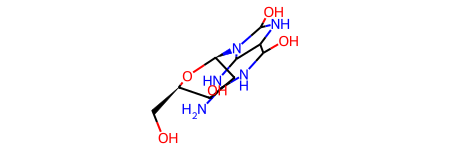

In [23]:
mol_c

In [25]:
coord = np.array(mol_c.GetConformer(0).GetPositions())
coord

array([[ 3.4500e-01,  5.1691e+01,  4.0000e-03],
       [-5.2100e-01,  5.1186e+01, -7.5000e-01],
       [-1.3440e+00,  5.0272e+01, -2.3000e-01],
       [-2.2870e+00,  4.9715e+01, -9.9100e-01],
       [-3.1170e+00,  4.8816e+01, -5.1300e-01],
       [-2.4710e+00,  5.0010e+01, -2.2760e+00],
       [-1.6670e+00,  5.0924e+01, -2.8590e+00],
       [-6.5400e-01,  5.1550e+01, -2.1040e+00],
       [-8.0000e-03,  5.2412e+01, -2.9350e+00],
       [-6.3500e-01,  5.2268e+01, -4.1130e+00],
       [-2.8800e-01,  5.2921e+01, -5.1640e+00],
       [-1.6470e+00,  5.1382e+01, -4.1100e+00],
       [-2.5440e+00,  5.0985e+01, -5.2430e+00],
       [-3.7330e+00,  5.0203e+01, -4.9760e+00],
       [-1.7440e+00,  5.0138e+01, -6.2270e+00],
       [-2.7820e+00,  4.9276e+01, -6.9160e+00],
       [-2.6750e+00,  4.9605e+01, -8.3030e+00],
       [-4.1000e+00,  4.9726e+01, -6.2810e+00],
       [-5.1850e+00,  4.8669e+01, -6.3070e+00],
       [-4.7560e+00,  4.7587e+01, -7.1520e+00]])

In [15]:
import numpy as np
ligand_coords = np.array([conf.GetAtomPosition(atom) for atom in ligand.GetAtoms()])
# protein_coords = np.array([atom.GetPosition() for atom in protein.GetAtoms()])

ArgumentError: Python argument types in
    Conformer.GetAtomPosition(Conformer, Atom)
did not match C++ signature:
    GetAtomPosition(RDKit::Conformer const*, unsigned int)

In [40]:
from Qbio_dataset import calculate_distance

protein_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio/1fd7/1fd7_protein.pdb'
ligand_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio/3gxz/3gxz_1_kmer_C.pdb'

ligand = Chem.MolFromPDBFile(ligand_path)

# calculate_distance(ligand_path,protein_path)

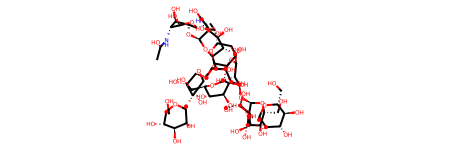

In [41]:
ligand

In [50]:
import os

folder_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio'
folders = os.listdir(folder_path)

total_folders = 0
folders_with_more_than_2_files = 0

for folder in folders:
    folder_full_path = os.path.join(folder_path, folder)
    if os.path.isdir(folder_full_path):
        total_folders += 1
        files = os.listdir(folder_full_path)
        if len(files) < 1:
            folders_with_more_than_2_files += 1

proportion = folders_with_more_than_2_files / total_folders

proportion


0.0030859354568753597

In [45]:
import pandas as pd
df_all=pd.read_csv('Qbio_dataset_aft.csv')

In [49]:
dic = {}
for idx, row in df_all.iterrows():
    if row['PDB'] not in dic:
        dic[row['PDB']] = 1
    else :
        dic[row['PDB']] += 1
tot = 0
for key in dic:
    if dic[key] > 1:
        tot += 1
print(tot / len(dic))

0.2857591787566124


In [2]:
import os
folder_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_processed'
goal_path = '/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/PDBBind_Qbio'
folders = os.listdir(folder_path)
folders.remove('4jdf')
folders.remove('4pox')
folders.remove('1qon')
folders.remove('5ab1')
folders.remove('1a50')
import pandas as pd
df_all=pd.read_csv('Qbio_dataset_aft.csv')
pdbbind_index = {}
with open('/home/t-kaiyuangao/Workspace/DynamicBind/PDBBindData/INDEX_general_PL_data.2020', 'r') as f:
    # Skip the header lines
    for _ in range(6):
        next(f)
        
    # Parse the rest of the lines
    for line in f:
        # Split the line into columns
        columes = line.split()

        # Extract the information
        pdb_code = columes[0]
        ligand_name = columes[7][1:-1] # skip ()
        pdbbind_index[pdb_code] = ligand_name

for folder in folders:
    folder_full_path = os.path.join(goal_path, folder)
    if os.path.isdir(folder_full_path):
        files = os.listdir(folder_full_path)
        if len(files) < 2:
            for file in files:
                file_path = os.path.join(folder_full_path, file)
                os.remove(file_path)
            import shutil
            shutil.copy(f'{folder_path}/{folder}/{folder}_protein_processed.pdb', folder_full_path)
            shutil.copy(f'{folder_path}/{folder}/{folder}_ligand.mol2', folder_full_path)
            df_all = df_all.append({'PDB': folder, 'PDB_file': f'{folder_full_path}/{folder}_protein_processed.pdb', 
                                    'Ligand': pdbbind_index[folder], 'Ligand_file': f'{folder_full_path}/{folder}_ligand.mol2',
                                      'BS': None, 'Gen': 0}, ignore_index=True)

df_all.to_csv('Qbio_dataset_final.csv', index=False)


/tmp/ipykernel_32402/4082243977.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append({'PDB': folder, 'PDB_file': f'{folder_full_path}/{folder}_protein_processed.pdb',
/tmp/ipykernel_32402/4082243977.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append({'PDB': folder, 'PDB_file': f'{folder_full_path}/{folder}_protein_processed.pdb',
/tmp/ipykernel_32402/4082243977.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append({'PDB': folder, 'PDB_file': f'{folder_full_path}/{folder}_protein_processed.pdb',
/tmp/ipykernel_32402/4082243977.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 